In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import cross_val_score
import logging

In [4]:
df = pd.read_csv("veh.csv")
df

,Distance_km,Duration,HourOfDay,Weekday,Vehicle Speedkm/h,MAFg/sec,Engine RPMRPM,Absolute Load%,OATDegC,Fuel RateL/hr,...,Intersection,Bus Stops,Elevation Rawm,Elevation Smoothedm,fuel_consump,Vehicle Type,Generalized_Weight,Engine_Config,Displacement_L,Engine_Tags
0,-0.469282,-0.589886,0.586518,3,0.444062,0.102233,0.163871,0.676056,-0.196645,0.427055,...,-0.666667,-0.368421,0.157010,0.157010,-0.354001,2,-1.000000,3,-0.12,0
1,-0.295355,-0.367064,0.931897,3,0.375156,0.126837,0.125161,0.708331,-0.196645,0.460471,...,-0.666667,-0.368421,0.097402,0.097402,-0.085471,2,-1.000000,3,-0.12,0
2,0.183079,0.005507,0.577484,4,0.382005,0.127415,0.007742,0.761134,-0.221226,0.452514,...,-0.333333,0.052632,0.212188,0.212188,0.269308,2,-1.000000,3,-0.12,0
3,-0.741790,-0.649404,0.719944,3,0.309051,0.000000,-3.376774,-1.641013,-0.196645,0.000000,...,0.066667,0.000000,0.353244,0.353244,-0.608862,0,0.000000,10,-0.72,1
4,-0.393203,0.100821,0.894371,4,0.199297,0.088967,-0.530171,-1.587923,-0.208752,0.644280,...,-0.166667,0.105263,0.260719,0.260719,1.443374,0,0.000000,10,-0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,1.029253,0.930050,0.778318,2,0.365115,0.225637,-0.376774,-1.641013,-0.860324,0.571335,...,1.033333,1.526316,0.435995,0.435995,2.282115,2,0.052419,11,0.88,0
32548,-0.333963,-0.460683,0.923558,5,0.450745,0.150592,0.687742,0.375628,-1.007808,0.546032,...,-0.533333,-0.368421,0.402457,0.402457,-0.007559,1,0.500000,3,-0.72,5
32549,0.626541,0.912258,0.799861,6,0.317595,0.216305,-0.187097,-1.641013,-0.934066,0.501631,...,2.433333,2.263158,0.389318,0.389318,1.571344,2,0.052419,11,0.80,0
32550,-0.122844,-0.341011,0.835302,6,0.443648,0.156107,-0.512258,-1.641013,-0.934066,0.528305,...,-0.166667,0.789474,0.514118,0.514122,0.114589,2,0.052419,11,0.80,0


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\n{name} Evaluation:")
    print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
    print(f"Test  MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
    print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
    print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
    print(f"Test  R²: {r2_score(y_test, y_test_pred):.4f}")


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 100), model_name="Model"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Training examples")
    plt.ylabel(scoring.upper())
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"learning_curve_{model_name.lower().replace(' ', '_')}.png", dpi=300)
    plt.show()


In [6]:
# Define features and target
X = df.drop(columns=['fuel_consump'])  # Drop target
y = df['fuel_consump']                # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)


# XG Boost

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
import xgboost as xgb
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Create the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the random search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model and params
best_model = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Test MAE: 0.03755687369935495


In [7]:
# XGB best model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    subsample=1.0,
    reg_lambda=2,
    reg_alpha=0.5,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.2,
    gamma=0,
    colsample_bytree=1.0,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_list = []
rmse_list = []
r2_list = []

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Append to list
mae_list.append(mae)
rmse_list.append(rmse)
r2_list.append(r2)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0376
Root Mean Squared Error (RMSE): 0.2508
R² Score: 0.9557


In [9]:
# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print(f"XGBoost CV R²: {cv_scores_xgb.mean():.4f} ± {cv_scores_xgb.std():.4f}")

XGBoost CV R²: 0.9685 ± 0.0128


In [10]:
# Evaluate the modle overfitting and performance
evaluate_model(xgb_model, X_train, y_train, X_test, y_test, "XGBoost")


XGBoost Evaluation:
Train MAE: 0.0169
Test  MAE: 0.0376
Train RMSE: 0.0281
Test  RMSE: 0.2508
Train R²: 0.9994
Test  R²: 0.9557


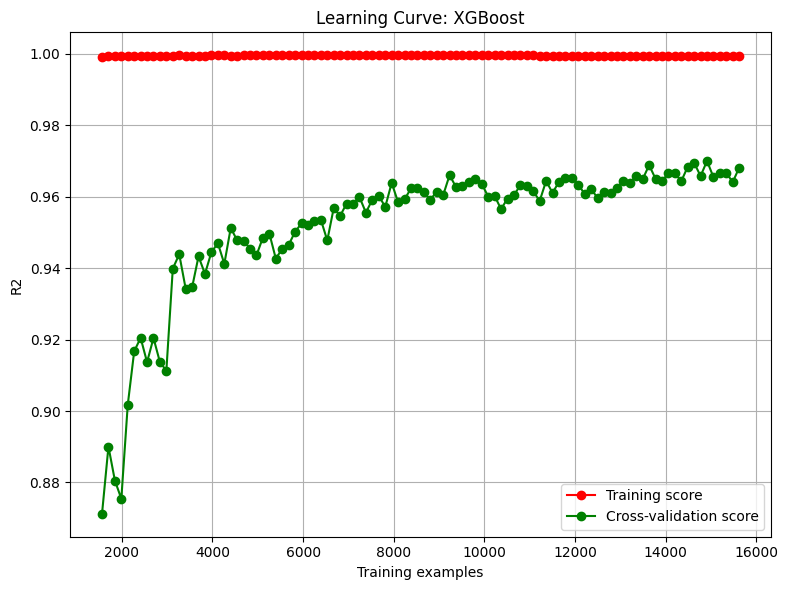

In [11]:
# Plot learning curve
plot_learning_curve(xgb_model, X_train, y_train, cv=5, scoring='r2', model_name="XGBoost")

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logging.info("Starting RandomizedSearchCV...")


# Define the parameter grid
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Instantiate the base model
rf = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,                # Number of different combinations to try
    cv=5,                     # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,                # Use all available cores
    scoring='neg_mean_absolute_error',
    random_state=42
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Best model
best_rf_model = random_search.best_estimator_

# Evaluation on test data
y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", random_search.best_params_)
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R2: {r2:.4f}")


2025-07-04 12:02:48,098 - Starting RandomizedSearchCV...


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/vluan/Documents/Projects/VED-master/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}
Test MAE: 0.0855
Test RMSE: 0.3665
Test R2: 0.9053


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the best model
rf_model = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=50,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Test MAE: 0.0855
Test RMSE: 0.3665
Test R²: 0.9053


In [17]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Append to list
mae_list.append(mae_rf)
rmse_list.append(rmse_rf)
r2_list.append(r2_rf)

# Print the results
print(f"Random Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.0855
Root Mean Square Error (RMSE): 0.3665
R² Score: 0.9053


In [18]:
# Cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest Cross-Validated R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Random Forest Cross-Validated R²: 0.9061 ± 0.0234


In [20]:
# Evaluate the model
evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")


Random Forest Evaluation:
Train MAE: 0.0333
Test  MAE: 0.0855
Train RMSE: 0.1297
Test  RMSE: 0.3665
Train R²: 0.9872
Test  R²: 0.9053


In [ ]:
# Plot learning curve
plot_learning_curve(rf_model, X_train, y_train, cv=5, scoring='r2', model_name="RandomForest")

# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)


LinearRegression()

In [62]:
# Make predictions on test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Append to list
mae_list.append(mae)
rmse_list.append(rmse)
r2_list.append(r2)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.3009
R² Score: 0.7290
Root Mean Squared Error (RMSE): 0.6204


/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [63]:
# Cross-validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest Cross-Validated R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Random Forest Cross-Validated R²: 0.7277 ± 0.0363


/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Us

In [64]:
# Evaluate the model
evaluate_model(lr_model, X_train, y_train, X_test, y_test, name="Linear Regressor")


Linear Regressor Evaluation:
Train MAE: 0.3010
Test  MAE: 0.3009
Train RMSE: 0.5920
Test  RMSE: 0.6204
Train R²: 0.7333
Test  R²: 0.7290


/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Us

/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vluan/Documents/Projects/VED-master/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Us

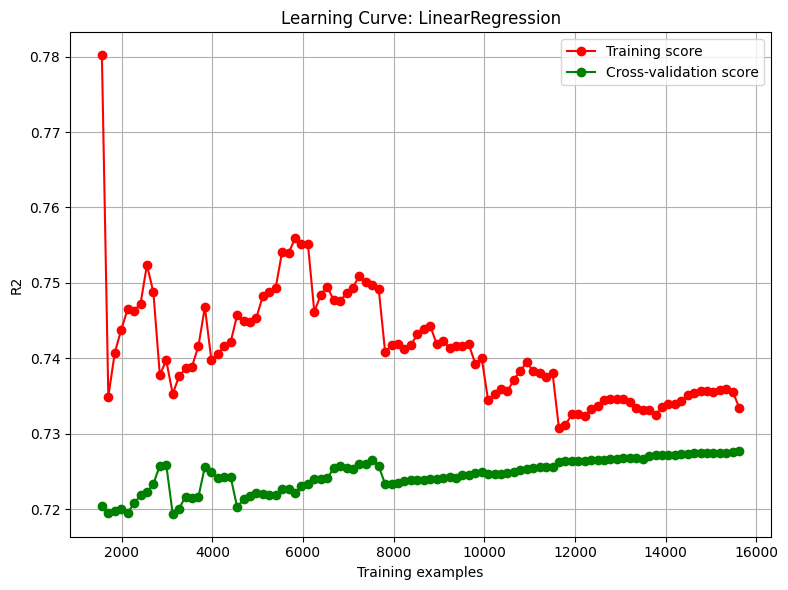

In [65]:
# Plot learning curve
plot_learning_curve(lr_model, X_train, y_train, cv=5, scoring='r2', model_name="LinearRegression")

# Plots

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

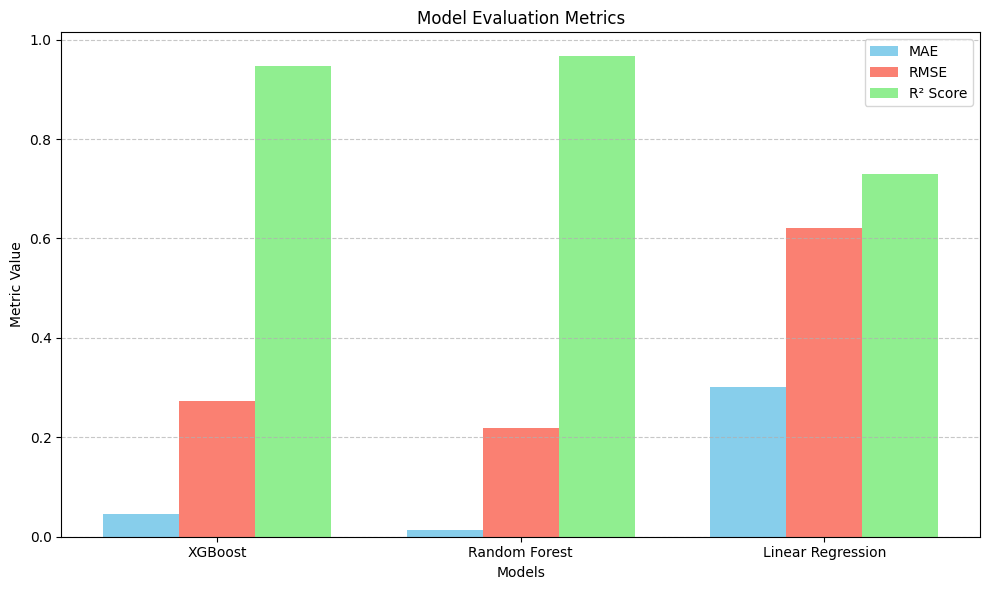

In [48]:


models = ['XGBoost', 'Random Forest', 'Linear Regression']

# Bar positions
x = np.arange(len(models))  # [0, 1, 2]
width = 0.25  # width of the bars

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width, mae_list, width=width, label='MAE', color='skyblue')
plt.bar(x, rmse_list, width=width, label='RMSE', color='salmon')
plt.bar(x + width, r2_list, width=width, label='R² Score', color='lightgreen')

# Labels and title
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics')
plt.xticks(ticks=x, labels=models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()

plt.savefig('evaluation.png', dpi=300, bbox_inches='tight')  # Save with high quality

plt.show()

# Save the plot


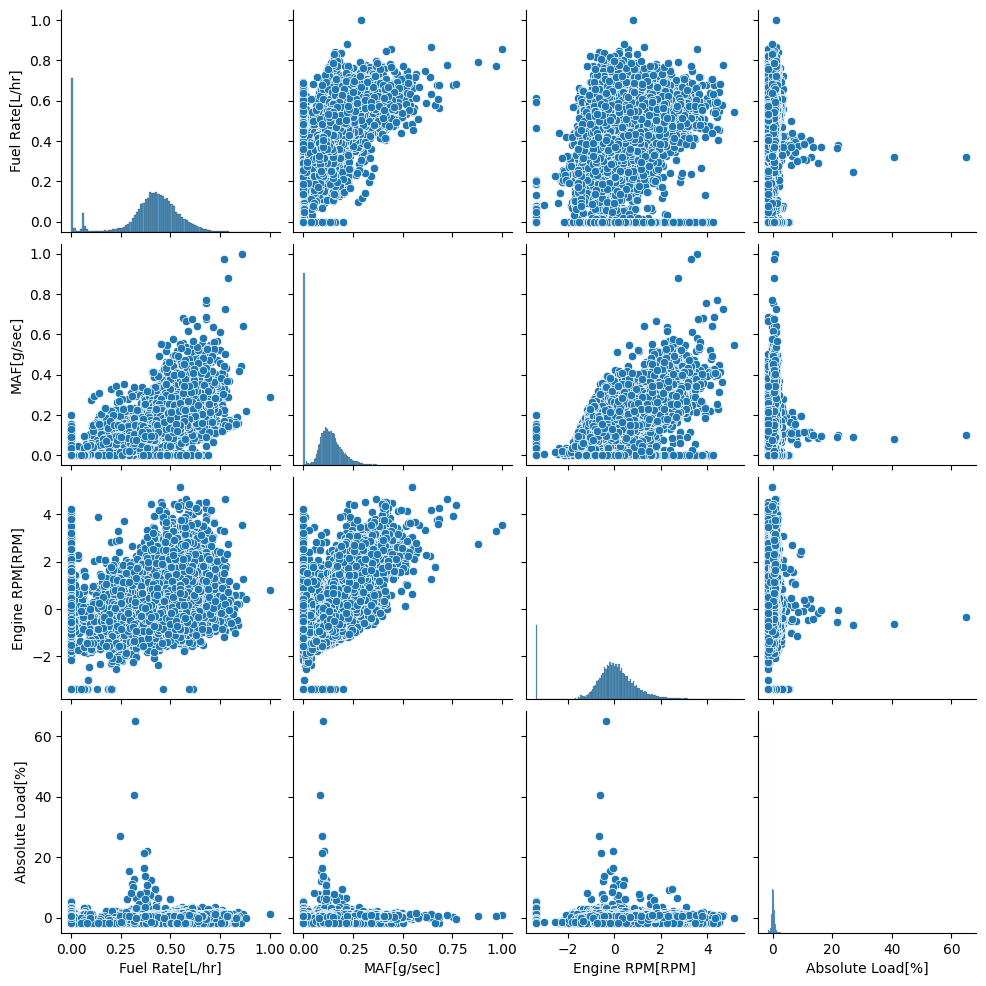

In [34]:
sns.pairplot(df[['Fuel Rate[L/hr]', 'MAF[g/sec]', 'Engine RPM[RPM]', 'Absolute Load[%]']])


<Axes: xlabel='HourOfDay'>

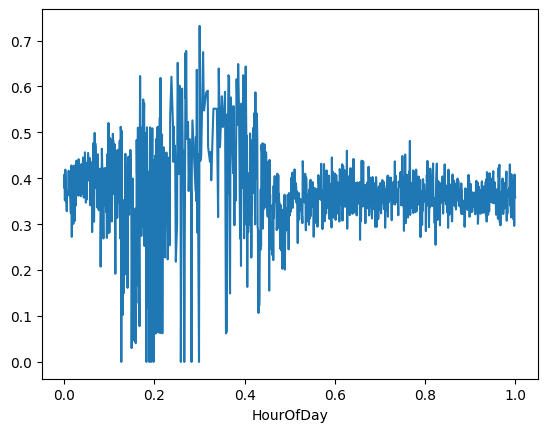

In [36]:
df.groupby('HourOfDay')['Fuel Rate[L/hr]'].mean().plot()
